In [1]:
import numpy as np

import os
from math import ceil

from statsmodels.stats.api import DescrStatsW
from scipy.stats import ttest_rel, sem

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def labels_to_counts(labels, time_axis=0):
    onehot = np.zeros((labels.size, n_classes), dtype=int)
    onehot[np.arange(labels.size), labels] = 1
    return onehot.cumsum(axis=time_axis)


# data = 'square'
# budget = 100
# n_classes = 6
# class_names = ['center', 'corner1', 'corner2', 'corner3', 'corner4']

data = 'citeseer'
budget = 500
n_classes = 5
class_names = ['NeurIPS', 'ICML', 'UAI', 'JMLR']

assert len(class_names) == n_classes - 1

policies = [
    'ens jensen greedy',
    'classical ens',
    'greedy',
    'round robin greedy',
]
    
linestyles = [
    '-',
    '--',
    'dotted',
    'dashdot'
]
assert len(policies) == len(linestyles)

n_exps = 20
init_size = 1
group_size = n_classes - 1

basepath = os.path.join('../../data/results', data, str(group_size))


class_counts = -1 * np.ones(
    (len(policies), n_exps, init_size + budget, n_classes), dtype=int
)

for p_ind, policy in enumerate(policies):
    for i in range(n_exps):
        labels = np.loadtxt(
            os.path.join(basepath, policy, f'{policy}__labels__{i + 1}.csv'), 
            dtype=int
        ).flatten() - 1
        
        class_counts[p_ind, i, :] = labels_to_counts(labels)
        
assert np.all(class_counts != -1)

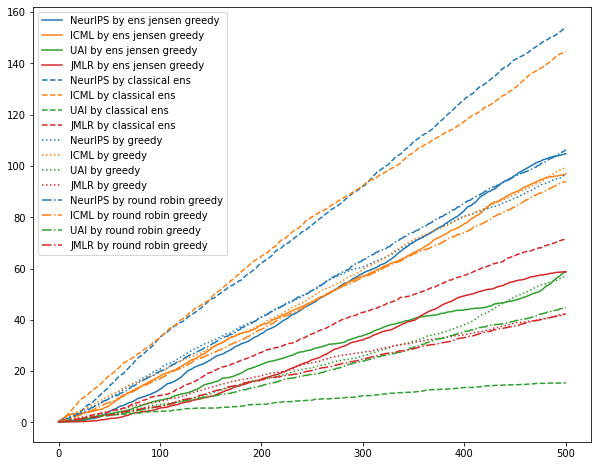

In [3]:
plt.figure(figsize=(10, 8))

for i, (policy, style) in enumerate(zip(policies, linestyles)):
    for c in range(1, n_classes):
        plt.plot(
            class_counts[i, :, :, c].mean(axis=0), 
            linestyle=style, 
            c=f'C{c - 1}', 
            label=f'{class_names[c - 1]} by {policy}'
        )
        
plt.legend();

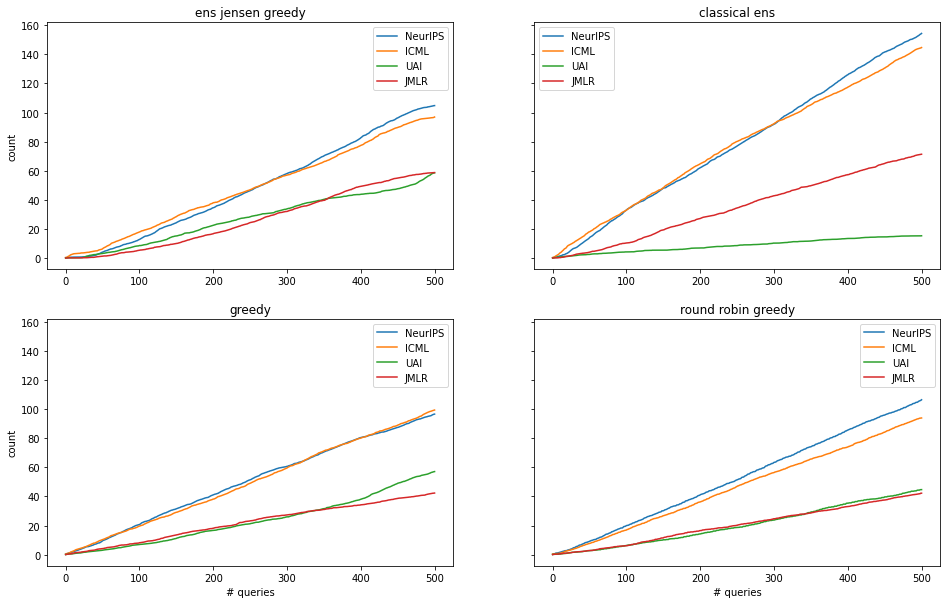

In [4]:
fig, ax = plt.subplots(
    2, 
    ceil(len(policies) / 2),
    figsize=(4 * len(policies), 10), 
    sharey=True
)

for i, (policy, style) in enumerate(zip(policies, linestyles)):
    tmp_ax = ax[i // 2][i % 2]
    
    for c in range(1, n_classes):
        tmp_ax.plot(
            class_counts[i, :, :, c].mean(axis=0),
            # linestyle=style, 
            c=f'C{c - 1}', 
            label=class_names[c - 1]
        )
        
        tmp_ax.legend()
        tmp_ax.set_title(policy)
    
    if i // 2 == len(ax) - 1:
        tmp_ax.set_xlabel('# queries')
    if i % 2 == 0:
        tmp_ax.set_ylabel('count')
        
plt.show()